In [39]:
# Loading necessary libraries
library("tidyverse")
library("caret")

In [40]:
eu_deposits <- "EU_deposits_1yr_data.csv"
eu_inflation <- "EU_Inflation_HICP_data.csv"
# Check if our data have title row and what is the delimiter
read_lines(eu_deposits, n_max = 3)
read_lines(eu_inflation, n_max = 3)


[1] "Data Source in SDW: https://sdw.ecb.europa.eu/browse.do?node=9691394"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
[2] ",MIR.M.AT.B.L22.F.R.A.2250.EUR.N,MIR.M.BE.B.L22.F.R.A.2250.EUR.N,MIR.M.BG.B.L22.F.R.A.2250.BGN.N,MIR.M.CY.B.L22.F.R.A.2250.EUR.N,MIR.M.CZ.B.L22.F.R.A.2250.CZK.N,MIR.M.DE.B.L22.F.R.A.2250.EUR.N,MIR.M.DK.B.L22.F.R.A.2250.DKK.N,MIR.M.EE.B.L22.F.R.A.2250.EEK.N,MIR.M.EE.B.L22.F.R.A.2250.EUR.N,MIR.M.ES.B.L22.F.R.A.2250.EUR.N,MIR.M.FI.B.L22.F.R.A.2250.EUR.N,MIR.M.FR.B.L22.F.R.A.2250.EUR.N,MIR.M.GR.B.L22.F.R.A.2250.EUR.N,MIR.M.HR.B.L22.F.R.A.2250.HRK.N,MIR.M.HU.B.L22.F.R.A.2250.HUF.N,MIR.M.IE.B.L22.F.R.A.2250.EUR.N,MIR.M.IT.B.L22.F.R.A.2250.EUR.N,MIR.M.LT.B.L22.F.R.A.2250.EUR.N,MIR.M.LT.B.L22.F.R.A.2250.LTL.N,MIR.M.LU.B.L22.F.R.A.2250.EUR.N,MIR.M.LV.B.L22.F.R.A.2250.EUR.N,MIR.M.LV.B.L22.F.R.A.2250.LVL.N,MIR.M.MT.B.L22.F.R.A.2250.EUR.N,MIR.M.MT.B.L22.F.R.A.2250.MTL.N,MIR.M.NL.B.L22.F.R.A.2250.EUR.N,MIR.M.PL.B.L22.F.R.A.2250.PLN.N,MIR.M.PT.B.L22.F.R.A.2250.EUR.N,MIR.M.RO.B.L22.F.R.A.2250.RON.N,MIR.M.SE.B.L22.F.R.A.2250.SEK.N,MIR.M.SI.B.L22.F.R.A.2250.EUR.N,MIR.M.SI.B.L22.F.R.A.2250.SIT.N,MIR.M.SK.B.L22.F.R.A.2250.EUR.N,MIR.M.SK.B.L22.F.R.A.2250.SKK.N"
[3] ",\"Austria, Euro\",\"Belgium, Euro\",\"Bulgaria, Bulgarian lev\",\"Cyprus, Euro\",\"Czech Republic, Czech koruna\",\"Germany, Euro\",\"Denmark, Danish krone\",\"Estonia, Estonian kroon\",\"Estonia, Euro\",\"Spain, Euro\",\"Finland, Euro\",\"France, Euro\",\"Greece, Euro\",\"Croatia, Croatian kuna\",\"Hungary, Hungarian forint\",\"Ireland, Euro\",\"Italy, Euro\",\"Lithuania, Euro\",\"Lithuania, Lithuanian litas\",\"Luxembourg, Euro\",\"Latvia, Euro\",\"Latvia, Latvian lats\",\"Malta, Euro\",\"Malta, Maltese lira\",\"Netherlands, Euro\",\"Poland, Polish zloty\",\"Portugal, Euro\",\"Romania, Romanian leu\",\"Sweden, Swedish krona\",\"Slovenia, Euro\",\"Slovenia, Slovenian tolar\",\"Slovakia, Euro\",\"Slovakia, Slovak koruna\""

[1] "Data Source in SDW: https://sdw.ecb.europa.eu/browseChart.do?org.apache.struts.taglib.html.TOKEN=46c52daef2587d98a7880dbacfe169eb&df=true&ec=&dc=&oc=&pb=&rc=&DATASET=0&removeItem=&removedItemList=&mergeFilter=&activeTab=ICP&showHide=&REF_AREA.19=AT&REF_AREA.19=BE&REF_AREA.19=BG&REF_AREA.19=CY&REF_AREA.19=CZ&REF_AREA.19=D0&REF_AREA.19=DE&REF_AREA.19=DK&REF_AREA.19=EE&REF_AREA.19=ES&REF_AREA.19=FI&REF_AREA.19=FR&REF_AREA.19=GR&REF_AREA.19=HR&REF_AREA.19=HU&REF_AREA.19=IE&REF_AREA.19=IT&REF_AREA.19=LT&REF_AREA.19=LU&REF_AREA.19=LV&REF_AREA.19=MT&REF_AREA.19=NL&REF_AREA.19=PL&REF_AREA.19=PT&REF_AREA.19=RO&REF_AREA.19=SE&REF_AREA.19=SI&REF_AREA.19=SK&ICP_ITEM.19=000000&ICP_SUFFIX.19=ANR&MAX_DOWNLOAD_SERIES=500&SERIES_MAX_NUM=50&node=9691209&legendRef=reference&legendNor=&SERIES_KEY_checkall=on&SERIES_KEY=122.ICP.M.BG.N.000000.4.ANR&SERIES_KEY=122.ICP.M.CZ.N.000000.4.ANR&SERIES_KEY=122.ICP.M.DK.N.000000.4.ANR&SERIES_KEY=122.ICP.M.HR.N.000000.4.ANR&SERIES_KEY=122.ICP.M.HU.N.000000.4.ANR&SERIES_KEY=122.ICP.M.PL.N.000000.4.ANR&SERIES_KEY=122.ICP.M.RO.N.000000.4.ANR&SERIES_KEY=122.ICP.M.SE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.AT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.BE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.CY.N.000000.4.ANR&SERIES_KEY=122.ICP.M.D0.N.000000.4.ANR&SERIES_KEY=122.ICP.M.DE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.EE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.ES.N.000000.4.ANR&SERIES_KEY=122.ICP.M.FI.N.000000.4.ANR&SERIES_KEY=122.ICP.M.FR.N.000000.4.ANR&SERIES_KEY=122.ICP.M.GR.N.000000.4.ANR&SERIES_KEY=122.ICP.M.IE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.IT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.LT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.LU.N.000000.4.ANR&SERIES_KEY=122.ICP.M.LV.N.000000.4.ANR&SERIES_KEY=122.ICP.M.MT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.NL.N.000000.4.ANR&SERIES_KEY=122.ICP.M.PT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.SI.N.000000.4.ANR&SERIES_KEY=122.ICP.M.SK.N.000000.4.ANR"
[2] ",ICP.M.AT.N.000000.4.ANR,ICP.M.BE.N.000000.4.ANR,ICP.M.BG.N.000000.4.ANR,ICP.M.CY.N.000000.4.ANR,ICP.M.CZ.N.000000.4.ANR,ICP.M.D0.N.000000.4.ANR,ICP.M.DE.N.000000.4.ANR,ICP.M.DK.N.000000.4.ANR,ICP.M.EE.N.000000.4.ANR,ICP.M.ES.N.000000.4.ANR,ICP.M.FI.N.000000.4.ANR,ICP.M.FR.N.000000.4.ANR,ICP.M.GR.N.000000.4.ANR,ICP.M.HR.N.000000.4.ANR,ICP.M.HU.N.000000.4.ANR,ICP.M.IE.N.000000.4.ANR,ICP.M.IT.N.000000.4.ANR,ICP.M.LT.N.000000.4.ANR,ICP.M.LU.N.000000.4.ANR,ICP.M.LV.N.000000.4.ANR,ICP.M.MT.N.000000.4.ANR,ICP.M.NL.N.000000.4.ANR,ICP.M.PL.N.000000.4.ANR,ICP.M.PT.N.000000.4.ANR,ICP.M.RO.N.000000.4.ANR,ICP.M.SE.N.000000.4.ANR,ICP.M.SI.N.000000.4.ANR,ICP.M.SK.N.000000.4.ANR"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
[3] ",Austria,Belgium,Bulgaria,Cyprus,Czech Republic,EU (changing composition),Germany,Denmark,Estonia,Spain,Finland,France,Greece,Croatia,Hungary,Ireland,Italy,Lithuania,Luxembourg,Latvia,Malta,Netherlan

In [41]:
eu_deposits_data <- read_csv(eu_deposits, skip=2)
colnames(eu_deposits_data) <- make.names(colnames(eu_deposits_data))
colnames(eu_deposits_data)[1] <- "Date"
eu_inflation_data <- read_csv(eu_inflation, skip=2)
colnames(eu_inflation_data) <- make.names(colnames(eu_inflation_data))
colnames(eu_inflation_data)[1] <- "Date"

New names:
• `` -> `...1`
Rows: 515 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (34): ...1, Austria, Euro, Belgium, Euro, Bulgaria, Bulgarian lev, Cypru...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 420 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (29): ...1, Austria, Belgium, Bulgaria, Cyprus, Czech Republic, EU (chan...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [42]:
eu_deposits_data <- eu_deposits_data[c(-1, -2), ]
head(eu_deposits_data)

Date,Austria..Euro,Belgium..Euro,Bulgaria..Bulgarian.lev,Cyprus..Euro,Czech.Republic..Czech.koruna,Germany..Euro,Denmark..Danish.krone,Estonia..Estonian.kroon,Estonia..Euro,⋯,Malta..Maltese.lira,Netherlands..Euro,Poland..Polish.zloty,Portugal..Euro,Romania..Romanian.leu,Sweden..Swedish.krona,Slovenia..Euro,Slovenia..Slovenian.tolar,Slovakia..Euro,Slovakia..Slovak.koruna
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022Sep,0.80,0.84,0.12,0.11,6.10,0.84,1.15,NA,0.94,⋯,NA,1.84,5.44,0.05,6.44,1.65,0.11,NA,0.77,NA
2022Aug,0.37,0.37,0.11,0.06,5.98,0.49,0.25,NA,0.83,⋯,NA,1.53,5.22,0.07,6.22,1.21,0.04,NA,0.48,NA
2022Jul,0.23,0.11,0.09,0.05,5.95,0.31,-0.44,NA,0.59,⋯,NA,1.59,4.85,0.09,5.49,0.90,0.03,NA,0.21,NA
2022Jun,0.12,0.14,0.06,0.05,5.37,0.17,-0.45,NA,0.49,⋯,NA,1.47,4.50,0.07,4.37,0.53,0.03,NA,0.16,NA
2022May,0.08,0.07,0.04,0.05,4.53,0.14,-0.50,NA,0.50,⋯,NA,1.23,3.38,0.04,3.21,0.38,0.04,NA,0.21,NA
2022Apr,0.10,0.06,0.04,0.05,4.17,0.14,-0.51,NA,0.44,⋯,NA,1.15,2.03,0.04,2.56,0.32,0.03,NA,0.24,NA


In [43]:
eu_inflation_data <- eu_inflation_data[c(-1, -2), ]
head(eu_inflation_data)

Date,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,EU..changing.composition.,Germany,Denmark,Estonia,⋯,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022Oct,11.5,13.1,NA,8.6,NA,NA,11.6,NA,22.4,⋯,8.8,21.8,7.5,16.8,NA,10.6,NA,NA,10.3,14.5
2022Sep,10.9,12.1,15.6,9.0,17.8,10.9,10.9,11.1,24.1,⋯,8.8,22.0,7.4,17.1,15.7,9.8,13.4,10.3,10.6,13.6
2022Aug,9.3,10.5,15.0,9.6,17.1,10.1,8.8,9.9,25.2,⋯,8.6,21.4,7.0,13.7,14.8,9.3,13.3,9.5,11.5,13.4
2022Jul,9.4,10.4,14.9,10.6,17.3,9.8,8.5,9.6,23.2,⋯,9.3,21.3,6.8,11.6,14.2,9.4,13.0,8.3,11.7,12.8
2022Jun,8.7,10.5,14.8,9.0,16.6,9.6,8.2,9.1,22.0,⋯,10.3,19.2,6.1,9.9,14.2,9.0,13.0,8.9,10.8,12.6
2022May,7.7,9.9,13.4,8.8,15.2,8.8,8.7,8.2,20.1,⋯,9.1,16.8,5.8,10.2,12.8,8.1,12.4,7.5,8.7,11.8


In [45]:
# converting wide data into tidy data
eu_deposits_data <- eu_deposits_data |> pivot_longer(-Date, names_to = "country", values_to = "deposits")
eu_inflation_data <- eu_inflation_data |> pivot_longer(-Date, names_to = "country", values_to = "inflation")

In [9]:
# Getting more information about the structure of data objects
str(eu_deposits_data)
str(eu_inflation_data)

tibble [513 × 34] (S3: tbl_df/tbl/data.frame)
 $ Date                        : chr [1:513] "2022Sep" "2022Aug" "2022Jul" "2022Jun" ...
 $ Austria..Euro               : chr [1:513] "0.80" "0.37" "0.23" "0.12" ...
 $ Belgium..Euro               : chr [1:513] "0.84" "0.37" "0.11" "0.14" ...
 $ Bulgaria..Bulgarian.lev     : chr [1:513] "0.12" "0.11" "0.09" "0.06" ...
 $ Cyprus..Euro                : chr [1:513] "0.11" "0.06" "0.05" "0.05" ...
 $ Czech.Republic..Czech.koruna: chr [1:513] "6.10" "5.98" "5.95" "5.37" ...
 $ Germany..Euro               : chr [1:513] "0.84" "0.49" "0.31" "0.17" ...
 $ Denmark..Danish.krone       : chr [1:513] "1.15" "0.25" "-0.44" "-0.45" ...
 $ Estonia..Estonian.kroon     : chr [1:513] NA NA NA NA ...
 $ Estonia..Euro               : chr [1:513] "0.94" "0.83" "0.59" "0.49" ...
 $ Spain..Euro                 : chr [1:513] "0.16" "0.01" "0.03" "0.01" ...
 $ Finland..Euro               : chr [1:513] "1.20" "0.62" "0.32" "0.28" ...
 $ France..Euro                :

In [46]:
head(eu_deposits_data)
head(eu_inflation_data)

Date,country,deposits
<chr>,<chr>,<chr>
2022Sep,Austria..Euro,0.80
2022Sep,Belgium..Euro,0.84
2022Sep,Bulgaria..Bulgarian.lev,0.12
2022Sep,Cyprus..Euro,0.11
2022Sep,Czech.Republic..Czech.koruna,6.10
2022Sep,Germany..Euro,0.84


Date,country,inflation
<chr>,<chr>,<chr>
2022Oct,Austria,11.5
2022Oct,Belgium,13.1
2022Oct,Bulgaria,NA
2022Oct,Cyprus,8.6
2022Oct,Czech.Republic,NA
2022Oct,EU..changing.composition.,NA


In [47]:
# Checking if columns of our data have any missing values
apply(eu_deposits_data, 2, function(col) sum(is.na(col)))
apply(eu_inflation_data, 2, function(col) sum(is.na(col)))

Date  country deposits 
       0        0    10080

Date   country inflation 
        0         0      2768

In [57]:
substring <- "Euro"
euro_zone <- eu_deposits_data[grepl(substring, eu_deposits_data$country, fixed=TRUE),]

In [50]:
head(euro_zone)

Date,country,deposits
<chr>,<chr>,<chr>
2022Sep,Austria..Euro,0.80
2022Sep,Belgium..Euro,0.84
2022Sep,Cyprus..Euro,0.11
2022Sep,Germany..Euro,0.84
2022Sep,Estonia..Euro,0.94
2022Sep,Spain..Euro,0.16


In [58]:
euro_zone <- substring(euro_zone$country, 1, nchar(euro_zone$country)-6)

In [61]:
euro_zone <- unique(euro_zone)
euro_zone

[1] "Austria"     "Belgium"     "Cyprus"      "Germany"     "Estonia"    
 [6] "Spain"       "Finland"     "France"      "Greece"      "Ireland"    
[11] "Italy"       "Lithuania"   "Luxembourg"  "Latvia"      "Malta"      
[16] "Netherlands" "Portugal"    "Slovenia"    "Slovakia"

In [71]:
inflation_euro_zone <- eu_inflation_data %>% filter(country %in% euro_zone)
head(inflation_euro_zone)
# inflation_euro_zone |> filter(startsWith(Date, '2018')) |> head()
inflation_euro_zone |> filter(Date == '2018Jan') |> head()

Date,country,inflation
<chr>,<chr>,<chr>
2022Oct,Austria,11.5
2022Oct,Belgium,13.1
2022Oct,Cyprus,8.6
2022Oct,Germany,11.6
2022Oct,Estonia,22.4
2022Oct,Spain,7.3


Date,country,inflation
<chr>,<chr>,<chr>
2018Jan,Austria,1.9
2018Jan,Belgium,1.8
2018Jan,Cyprus,-1.5
2018Jan,Germany,1.5
2018Jan,Estonia,3.6
2018Jan,Spain,0.7


In [63]:
inflation_non_euro_zone <- eu_inflation_data %>% filter(!country %in% euro_zone)
head(inflation_non_euro_zone)

Date,country,inflation
<chr>,<chr>,<chr>
2022Oct,Bulgaria,NA
2022Oct,Czech.Republic,NA
2022Oct,EU..changing.composition.,NA
2022Oct,Denmark,NA
2022Oct,Croatia,NA
2022Oct,Hungary,NA


In [64]:
pandemic <- "2020Mar"
year_pandemic <- "2021Mar"
attack_on_ukraine <- "2022Mar"
now <- "2022Sep"

In [80]:
#split data into time intervals for non euro zone
n = sum(inflation_non_euro_zone$Date == pandemic)
pre_pandemic_inf_non_euro <- inflation_non_euro_zone[which(inflation_non_euro_zone$Date == "2018Jan")[1]:which(inflation_non_euro_zone$Date == pandemic)[n], ]
year_pandemic_inf_non_euro <- inflation_non_euro_zone[which(inflation_non_euro_zone$Date == pandemic)[1]:which(inflation_non_euro_zone$Date == year_pandemic)[n], ]
pre_attack_non_euro <- inflation_non_euro_zone[which(inflation_non_euro_zone$Date == year_pandemic)[1]:which(inflation_non_euro_zone$Date == attack_on_ukraine)[n], ]
after_attack_non_euro <- inflation_non_euro_zone[which(inflation_non_euro_zone$Date == attack_on_ukraine)[1]:which(inflation_non_euro_zone$Date == now)[n], ]

Warning message in Date == subset(Date, Date >= "2018Jan" & Date <= pandemic):
“długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu”
Warning message in which(inflation_non_euro_zone$Date == year_pandemic):which(inflation_non_euro_zone$Date == :
“wyrażenie liczbowe posiada 9 elementów: użyto tylko pierwszego”
Warning message in which(inflation_non_euro_zone$Date == year_pandemic):which(inflation_non_euro_zone$Date == :
“wyrażenie liczbowe posiada 9 elementów: użyto tylko pierwszego”
Warning message in which(inflation_non_euro_zone$Date == attack_on_ukraine):which(inflation_non_euro_zone$Date == :
“wyrażenie liczbowe posiada 9 elementów: użyto tylko pierwszego”
Warning message in which(inflation_non_euro_zone$Date == attack_on_ukraine):which(inflation_non_euro_zone$Date == :
“wyrażenie liczbowe posiada 9 elementów: użyto tylko pierwszego”


In [66]:
#split data into time intervals for euro zone
n = sum(inflation_euro_zone$Date == pandemic)
pre_pandemic_inf_euro <- inflation_euro_zone[which(inflation_euro_zone$Date == "2018Jan")[1]:which(inflation_euro_zone$Date == pandemic)[n], ]
year_pandemic_inf_euro <- inflation_euro_zone[which(inflation_euro_zone$Date == pandemic)[1]:which(inflation_euro_zone$Date == year_pandemic), ]
pre_attack_euro <- inflation_euro_zone[which(inflation_euro_zone$Date == year_pandemic)[1]:which(inflation_euro_zone$Date == attack_on_ukraine), ]
after_attack_euro <- inflation_euro_zone[which(inflation_euro_zone$Date == attack_on_ukraine)[1]:which(inflation_euro_zone$Date == now), ]

Warning message in which(inflation_euro_zone$Date == "2018Jan"):which(inflation_euro_zone$Date == :
“wyrażenie liczbowe posiada 19 elementów: użyto tylko pierwszego”
Warning message in which(inflation_euro_zone$Date == "2018Jan"):which(inflation_euro_zone$Date == :
“wyrażenie liczbowe posiada 19 elementów: użyto tylko pierwszego”
Warning message in which(inflation_euro_zone$Date == pandemic):which(inflation_euro_zone$Date == :
“wyrażenie liczbowe posiada 19 elementów: użyto tylko pierwszego”
Warning message in which(inflation_euro_zone$Date == pandemic):which(inflation_euro_zone$Date == :
“wyrażenie liczbowe posiada 19 elementów: użyto tylko pierwszego”
Warning message in which(inflation_euro_zone$Date == year_pandemic):which(inflation_euro_zone$Date == :
“wyrażenie liczbowe posiada 19 elementów: użyto tylko pierwszego”
Warning message in which(inflation_euro_zone$Date == year_pandemic):which(inflation_euro_zone$Date == :
“wyrażenie liczbowe posiada 19 elementów: użyto tylko pierwszego

In [72]:
pre_pandemic_inf_euro

Date,country,inflation
<chr>,<chr>,<chr>
2018Jan,Austria,1.9
2018Feb,Slovakia,2.2
2018Feb,Slovenia,1.4
2018Feb,Portugal,0.7
2018Feb,Netherlands,1.3
2018Feb,Malta,1.3
2018Feb,Latvia,1.8
2018Feb,Luxembourg,1.1
2018Feb,Lithuania,3.2


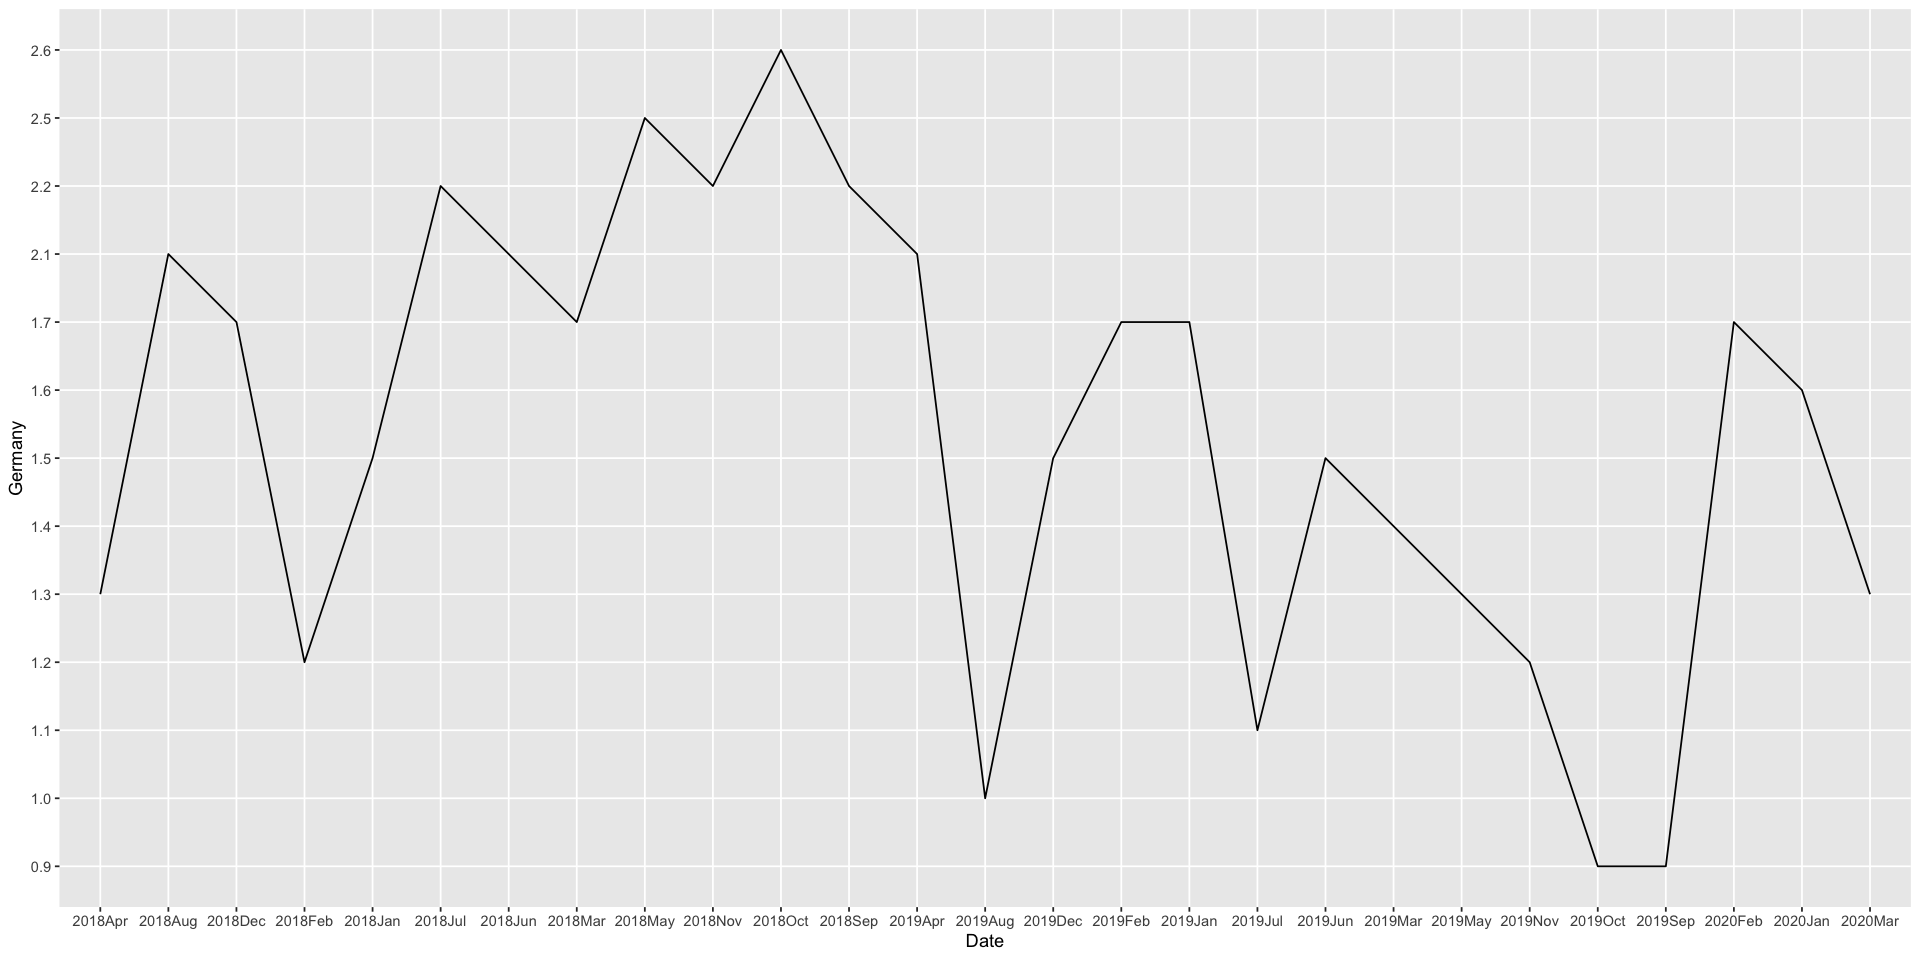

In [36]:
options(repr.plot.width=16, repr.plot.height=8)
pre_pandemic_inf_euro |> mutate(Date = as.factor(Date)) |> ggplot(aes(Date, Germany, group = 1)) + geom_line()